## 简答题
1. 如果训练集有100万个实例，训练决策树（无约束）大致的深度是多少？
2. 通常来说，子节点的基尼杂质是高于还是低于其父节点？是通常更高/更低？还是永远更高/更低？
3. 如果决策树过拟合训练集，减少max_depth是否为一个好主意？
4. 如果决策树对训练集欠拟合，尝试缩放输入特征是否为一个好主意？
5. 如果在给定的训练集上训练决策树需要一个小时，那么如果将特征数量变为两倍，训练大约需要多少时间？
6. 如果在包含100万个实例的训练集上训练决策树需要一个小时，那么在包含1000万个实例的训练集上训练决策树，大概需要多长时间？提示：考虑CART算法的计算复杂度。

## 编程题

1. 为 新月形 数据集训练并微调一棵决策树。

a. 使用make_moons(n_samples=10000，noise=0.4)生成一个 新月形 数据集。

b. 使用train_test_split()拆分训练集和测试集。

c. 使用交叉验证的网格搜索（在GridSearchCV类的帮助下）为Decision-TreeClassifier找到适合的超参数值。提示：尝试max_leaf_nodes的多种值。

d. 使用超参数对整个训练集进行训练，并测量模型在测试集上的性能。你应该得到约85%～87%的准确率。

2. 按照以下步骤种植森林。

a.继续之前的练习，生产1000个训练集子集，每个子集包含随机挑选的100个实例。提示：使用Scikit-Learn的ShuffleSplit类来实现。

b.使用前面得到的最佳超参数值，在每个子集上训练一棵决策树。在测试集上评估这1000棵决策树。因为训练集更小，所以这些决策树的表现可能比第一棵决策树要差一些，只能达到约80%的精度。

c.见证奇迹的时刻到了。用每个测试集实例，生成1000棵决策树的预测，然后仅保留次数最频繁的预测［可以使用SciPy的mode()函数］。这样你在测试集上可获得大多数投票的预测结果。

d.评估测试集上的这些预测，你得到的准确率应该比第一个模型更高（高出0.5%～1.5%）。恭喜，你已经训练出了一个随机森林分类器！

## 简答题

In [ ]:
# 1. 如果训练集有100万个实例，训练决策树（无约束）大致的深度是多少？

决策树深度与实例数的关系为:$深度=log_2(实例数)$

In [ ]:
import numpy as np

d=np.log2(10**7)
print(f'大致的深度是:{int(d)}')

In [ ]:
# 2. 通常来说，子节点的基尼杂质是高于还是低于其父节点？是通常更高/更低？还是永远更高/更低？
# 在决策树中，子节点的加权平均基尼系数一定小于或等于父节点的基尼系数，并且在有效的分裂下，通常是严格小于父节点的基尼系数。

# 3. 如果决策树过拟合训练集，减少max_depth是否为一个好主意？
# 是，减少 max_depth 通常是解决决策树过拟合的首选策略，它通过强制限制模型复杂度来防止学习训练数据中的噪声和过于特定的模式。

# 4. 如果决策树对训练集欠拟合，尝试缩放输入特征是否为一个好主意？
# 不是，决策树的分裂与特征值的量级无关，缩放特征无法解决欠拟合的问题

# 5. 如果在给定的训练集上训练决策树需要一个小时，那么如果将特征数量变为两倍，训练大约需要多少时间？
# 在样本数量不变的情况下，增加特征数量会显著增加决策树的训练时间，决策树（如 CART、ID3、C4.5 算法）在构建时，对于每个内部节点，都需要找到能最大程度降低不纯度（如基尼指数、熵）的“最佳”特征和该特征上的“最佳”分割点。这需要遍历每一个候选特征，并为每个特征找到最佳分割点。所以如果特征数量变为两倍那么训练时间也至少会变为两倍即两小时。

In [ ]:
# 6. 如果在包含100万个实例的训练集上训练决策树需要一个小时，那么在包含1000万个实例的训练集上训练决策树，大概需要多长时间？提示：考虑CART算法的计算复杂度。

CART 算法的时间复杂度为:$O(p*nlogn)$
p —— 特征数量
n —— 样本数量

In [ ]:
# 所以如果实例数量由10^6变为10^7,训练时间会变为70/6=11.67小时
round(70/6,2)

## 编程题

In [ ]:
# 1. 为 新月形 数据集训练并微调一棵决策树。
# a. 使用make_moons(n_samples=10000，noise=0.4)生成一个 新月形 数据集。
# b. 使用train_test_split()拆分训练集和测试集。
# c. 使用交叉验证的网格搜索（在GridSearchCV类的帮助下）为Decision-TreeClassifier找到适合的超参数值。提示：尝试max_leaf_nodes的多种值。
# d. 使用超参数对整个训练集进行训练，并测量模型在测试集上的性能。你应该得到约85%～87%的准确率。

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score

# a 生成数据
X,y=make_moons(n_samples=10000,noise=0.4)

# b 使用train_test_split()拆分训练集和测试集。
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# c 使用交叉验证的网格搜索（在GridSearchCV类的帮助下）为Decision-TreeClassifier找到适合的超参数值。提示：尝试max_leaf_nodes的多种值。
from sklearn.tree import DecisionTreeClassifier

# 定义决策树分类器和参数网格
dt_clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30 ,35],
    'min_samples_leaf': [1, 2, 5, 10, 15, 20, 25],
    'max_leaf_nodes':[10, 15, 20, 21, 22, 23, 24, 25],
    'criterion': ['gini', 'entropy']}

# 创建GridSearchCV对象
grid_search = GridSearchCV(estimator=dt_clf,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1,verbose=1)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print(f"最佳参数: {grid_search.best_params_}")
print(f"训练集最佳准确率: {grid_search.best_score_:.4f}")
# d 使用超参数对整个训练集进行训练，并测量模型在测试集上的性能。你应该得到约85%～87%的准确率。

# 使用最佳模型评估测试集
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"测试集准确率: {test_accuracy:.4f}")

Fitting 5 folds for each of 8960 candidates, totalling 44800 fits
最佳参数: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 22, 'min_samples_leaf': 1, 'min_samples_split': 2}
训练集最佳准确率: 0.8593
测试集准确率: 0.8610


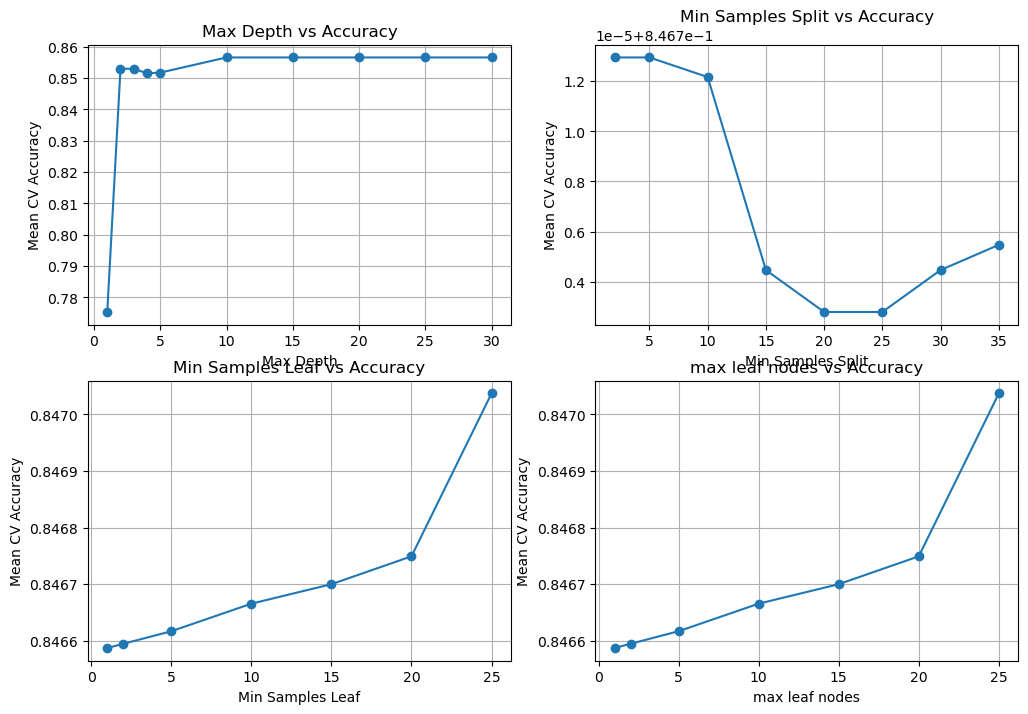

In [5]:
# 可视化参数与准确率的关系
# 1. max_depth 与准确率的关系
results = pd.DataFrame(grid_search.cv_results_)
max_depth_results = results.groupby('param_max_depth')['mean_test_score'].mean()

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
max_depth_results.plot(marker='o')
plt.title('Max Depth vs Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

# 2. min_samples_split 与准确率的关系
min_samples_split_results = results.groupby('param_min_samples_split')['mean_test_score'].mean()
plt.subplot(2, 2, 2)
min_samples_split_results.plot(marker='o')
plt.title('Min Samples Split vs Accuracy')
plt.xlabel('Min Samples Split')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

# 3. min_samples_leaf 与准确率的关系
min_samples_leaf_results = results.groupby('param_min_samples_leaf')['mean_test_score'].mean()
plt.subplot(2, 2, 3)
min_samples_leaf_results.plot(marker='o')
plt.title('Min Samples Leaf vs Accuracy')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

# 4. max_leaf_nodes 与准确率的关系
max_leaf_nodes_results = results.groupby('param_max_leaf_nodes')['mean_test_score'].mean()
plt.subplot(2, 2, 4)
min_samples_leaf_results.plot(marker='o')
plt.title('max leaf nodes vs Accuracy')
plt.xlabel('max leaf nodes')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)

In [ ]:
# 2. 按照以下步骤种植森林。
# a.继续之前的练习，生产1000个训练集子集，每个子集包含随机挑选的100个实例。提示：使用Scikit-Learn的ShuffleSplit类来实现。
# b.使用前面得到的最佳超参数值，在每个子集上训练一棵决策树。在测试集上评估这1000棵决策树。因为训练集更小，所以这些决策树的表现可能比第一棵决策树要差一些，只能达到约80%的精度。
# c.见证奇迹的时刻到了。用每个测试集实例，生成1000棵决策树的预测，然后仅保留次数最频繁的预测［可以使用SciPy的mode()函数］。这样你在测试集上可获得大多数投票的预测结果。
# d.评估测试集上的这些预测，你得到的准确率应该比第一个模型更高（高出0.5%～1.5%）。恭喜，你已经训练出了一个随机森林分类器！

In [6]:
# a 生产1000个训练集子集，每个子集包含随机挑选的100个实例。
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
subsets = []
for train_index, _ in shuffle_split.split(X_train):
    X_subset = X_train[train_index]
    y_subset = y_train[train_index]
    subsets.append((X_subset, y_subset))

# b.使用前面得到的最佳超参数值，在每个子集上训练一棵决策树。在测试集上评估这1000棵决策树。因为训练集更小，所以这些决策树的表现可能比第一棵决策树要差一些，只能达到约80%的精度。
best_params=grid_search.best_params_
all_predictions = []
tree_accuracies = []

for i, (X_sub, y_sub) in enumerate(subsets):
    tree = DecisionTreeClassifier(**best_params, random_state=i)
    tree.fit(X_sub, y_sub)
    y_pred = tree.predict(X_test)
    all_predictions.append(y_pred)
    acc = accuracy_score(y_test, y_pred)
    tree_accuracies.append(acc)

all_predictions = np.array(all_predictions)

# c.见证奇迹的时刻到了。用每个测试集实例，生成1000棵决策树的预测，然后仅保留次数最频繁的预测［可以使用SciPy的mode()函数］。这样你在测试集上可获得大多数投票的预测结果。
from scipy.stats import mode

ensemble_predictions, _ = mode(all_predictions, axis=0)
ensemble_predictions = ensemble_predictions.ravel()
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
initial_accuracy = test_accuracy

# d.评估测试集上的这些预测，你得到的准确率应该比第一个模型更高（高出0.5%～1.5%）。
print(f"单个最佳决策树的准确率: {initial_accuracy:.4f}")
print(f"单个小决策树的平均准确率: {np.mean(tree_accuracies):.4f}")
print(f"集成模型（多数投票）的准确率: {ensemble_accuracy:.4f}")
print(f"性能提升: {ensemble_accuracy - initial_accuracy:.4f} (+{(ensemble_accuracy - initial_accuracy)*100:.2f}%)")


单个最佳决策树的准确率: 0.8610
单个小决策树的平均准确率: 0.7846
集成模型（多数投票）的准确率: 0.8665
性能提升: 0.0055 (+0.55%)


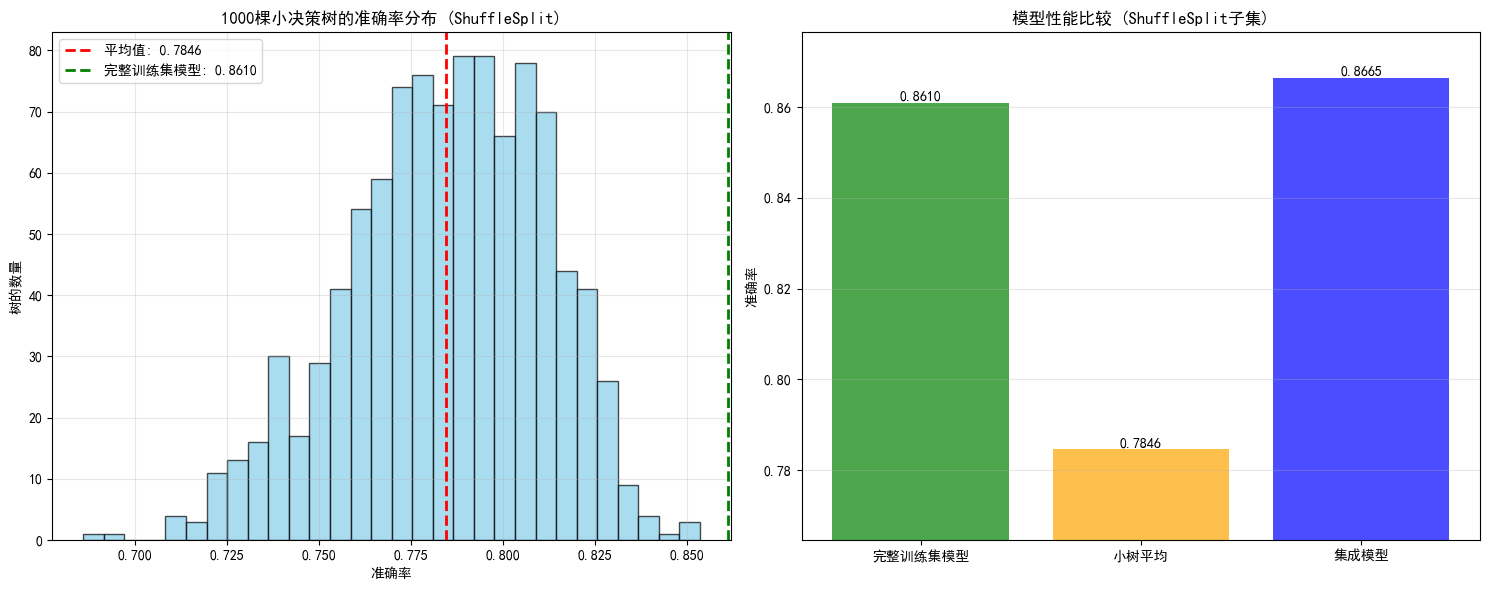


集成模型在44个样本上表现优于单个模型


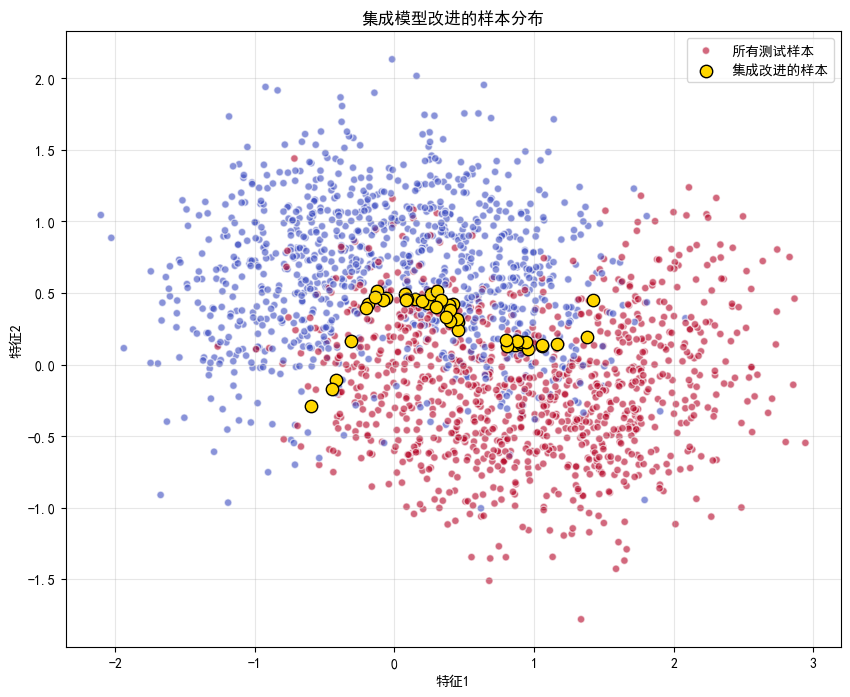

In [7]:
# 可视化结果-AI
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'KaiTi', 'FangSong', 'STSong']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 6))

# 1. 展示单个树的准确率分布
plt.subplot(1, 2, 1)
plt.hist(tree_accuracies, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(tree_accuracies), color='red', linestyle='dashed', linewidth=2,
            label=f'平均值: {np.mean(tree_accuracies):.4f}')
plt.axvline(initial_accuracy, color='green', linestyle='dashed', linewidth=2,
            label=f'完整训练集模型: {initial_accuracy:.4f}')
plt.xlabel('准确率')
plt.ylabel('树的数量')
plt.title('1000棵小决策树的准确率分布 (ShuffleSplit)')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. 展示性能提升
plt.subplot(1, 2, 2)
models = ['完整训练集模型', '小树平均', '集成模型']
accuracies = [initial_accuracy, np.mean(tree_accuracies), ensemble_accuracy]
colors = ['green', 'orange', 'blue']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7)
plt.ylabel('准确率')
plt.title('模型性能比较 (ShuffleSplit子集)')
plt.ylim(min(accuracies) - 0.02, max(accuracies) + 0.01)

# 在柱子上方添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom')

plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('shufflesplit_ensemble.png', dpi=300)
plt.show()

# 分析集成模型在哪些样本上表现更好
# 获取完整训练集模型的预测
full_model = DecisionTreeClassifier(**best_params, random_state=42)
full_model.fit(X_train, y_train)
full_pred = full_model.predict(X_test)

# 找出集成模型正确而单个模型错误的样本
improved_samples = np.where((ensemble_predictions == y_test) & (full_pred != y_test))[0]
print(f"\n集成模型在{len(improved_samples)}个样本上表现优于单个模型")

# 可视化这些样本
plt.figure(figsize=(10, 8))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm,
            alpha=0.6, edgecolors='w', s=30, label='所有测试样本')
plt.scatter(X_test[improved_samples, 0], X_test[improved_samples, 1],
            color='gold', edgecolors='k', s=80, label='集成改进的样本')
plt.title('集成模型改进的样本分布')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('improved_samples.png', dpi=300)
plt.show()